In [111]:
from sklearn import datasets
print(datasets.load_wine().DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [112]:
from sklearn import datasets

wine = datasets.load_wine()
X = wine.data
Y = wine.target

In [113]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X2 = pca.transform(X)
print(X2)

[[  3.18562979e+02   2.14921307e+01]
 [  3.03097420e+02  -5.36471768e+00]
 [  4.38061133e+02  -6.53730945e+00]
 [  7.33240139e+02   1.92729032e-01]
 [ -1.15714285e+01   1.84899946e+01]
 [  7.03231192e+02  -3.32158674e-01]
 [  5.42971581e+02  -1.35189666e+01]
 [  5.48401860e+02   1.14494324e+01]
 [  2.98036863e+02  -8.18015784e+00]
 [  2.98049553e+02  -7.10154294e+00]
 [  7.63079712e+02  -8.33431723e+00]
 [  5.32943228e+02  -1.42876338e+01]
 [  5.72834410e+02  -2.10050143e+01]
 [  4.02925358e+02  -1.61026352e+01]
 [  8.00053394e+02  -1.21184472e+01]
 [  5.63245578e+02   2.21482866e+00]
 [  5.33379651e+02   1.08048022e+01]
 [  3.83317591e+02   8.47741982e+00]
 [  9.33118387e+02  -8.35447844e+00]
 [  9.84031775e+01   1.43926594e+01]
 [  3.35935940e+01   2.55679565e+01]
 [  2.31464375e+01   1.81747309e+00]
 [  2.88093030e+02  -3.96304175e+00]
 [  2.67981513e+02  -9.57070401e+00]
 [  9.80198858e+01  -5.49584606e+00]
 [  8.34987440e+01   2.28916215e+01]
 [  4.47925596e+02  -1.47973313e+01]
 

In [114]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=10)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=3, weights="distance")

In [116]:
import numpy as np

estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 71.1%


In [117]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 68.1%


In [118]:
avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

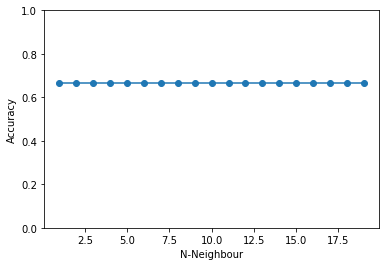

In [119]:
import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])

plt.show()

In [29]:
import sklearn

help(estimator)

Help on KNeighborsClassifier in module sklearn.neighbors.classification object:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [c